In [1]:
import sys
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OA-1cINHTyxIFeREJY4T2JnWjrP1kKLNljtQ47ry0ghP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'developingaflightdelaypredictionu-donotdelete-pr-hez261vc4alj9r'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [2]:
#Analyze the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [4]:
df.describe()

YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  11231.0  11231.000000  11231.000000  11231.000000  11231.000000   
mean    2016.0      2.544475      6.628973     15.790758      3.960199   
std        0.0      1.090701      3.354678      8.782056      1.995257   
min     2016.0      1.000000      1.000000      1.000000      1.000000   
25%     2016.0      2.000000      4.000000      8.000000      2.000000   
50%     2016.0      3.000000      7.000000     16.000000      4.000000   
75%     2016.0      3.000000      9.000000     23.000000      6.000000   
max     2016.0      4.000000     12.000000     31.000000      7.000000   

             FL_NUM  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  CRS_DEP_TIME  \
count  11231.000000       11231.000000     11231.000000  11231.000000   
mean    1334.325617       12334.516695     12302.274508   1320.798326   
std      811.875227        1595.026510      1601.988550    490.737845   
min        7.000000       10397.000000     10397.000000     10.000000   
25%      624.000000       10397.000000     10397.000000    905.000000   
50%     1267.000000       12478.000000     12478.000000   1320.000000   
75%     2032.000000       13487.000000     13487.000000   1735.000000   
max     2853.000000       14747.000000     14747.000000   2359.000000   

           DEP_TIME  ...  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  \
count  11124.000000  ...  11231.000000  11116.000000  11043.000000   
mean    1327.189410  ...   1537.312795   1523.978499     -2.573123   
std      500.306462  ...    502.512494    512.536041     39.232521   
min        1.000000  ...      2.000000      1.000000    -67.000000   
25%      905.000000  ...   1130.000000   1135.000000    -19.000000   
50%     1324.000000  ...   1559.000000   1547.000000    -10.000000   
75%     1739.000000  ...   1952.000000   1945.000000      1.000000   
max     2400.000000  ...   2359.000000   2400.000000    615.000000   

          ARR_DEL15     CANCELLED      DIVERTED  CRS_ELAPSED_TIME  \
count  11043.000000  11231.000000  11231.000000      11231.000000   
mean       0.124513      0.010150      0.006589        190.652124   
std        0.330181      0.100241      0.080908         78.386317   
min        0.000000      0.000000      0.000000         93.000000   
25%        0.000000      0.000000      0.000000        127.000000   
50%        0.000000      0.000000      0.000000        159.000000   
75%        0.000000      0.000000      0.000000        255.000000   
max        1.000000      1.000000      1.000000        397.000000   

       ACTUAL_ELAPSED_TIME      DISTANCE  Unnamed: 25  
count         11043.000000  11231.000000          0.0  
mean            179.661233   1161.031965          NaN  
std              77.940399    643.683379          NaN  
min              75.000000    509.000000          NaN  
25%             117.000000    594.000000          NaN  
50%             149.000000    907.000000          NaN  
75%             236.000000   1927.000000          NaN  
max             428.000000   2422.000000          NaN  

[8 rows x 22 columns]

In [5]:
#handling missing values

In [6]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [7]:
df['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [8]:
#data visualization


In [9]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'scatter plot between ARR_DELAY and ARR_DEL15')

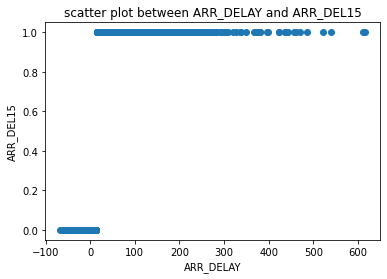

In [10]:
plt.scatter(df['ARR_DELAY'],df['ARR_DEL15'])
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.title('scatter plot between ARR_DELAY and ARR_DEL15')


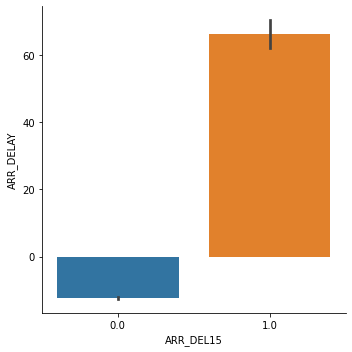

In [11]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=df)

<AxesSubplot:>

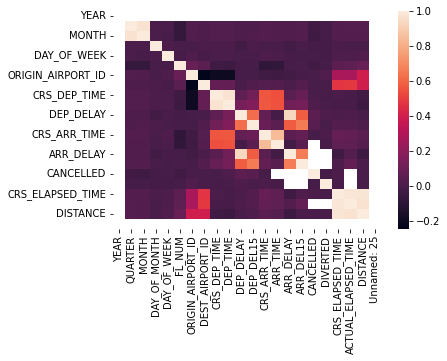

In [12]:
sns.heatmap(df.corr())

In [13]:
df=df.drop('Unnamed: 25',axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [14]:
df=df[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
df.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [15]:
df=df.fillna({'ARR_DEL15':1})
df=df.fillna({'DEP_DEL15':0})
df.iloc[177:185]

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_ARR_TIME  \
177    2834      1             9            6    MSP  SEA           852   
178    2839      1             9            6    DTW  JFK          1724   
179      86      1            10            7    MSP  DTW          1632   
180      87      1            10            7    DTW  MSP          1649   
181     423      1            10            7    JFK  ATL          1600   
182     440      1            10            7    JFK  ATL           849   
183     485      1            10            7    JFK  SEA          1945   
184     557      1            10            7    MSP  DTW           912   

     DEP_DEL15  ARR_DEL15  
177        0.0        1.0  
178        0.0        0.0  
179        0.0        1.0  
180        1.0        0.0  
181        0.0        0.0  
182        0.0        0.0  
183        1.0        0.0  
184        0.0        1.0

In [16]:
import math

for index,row in df.iterrows():
    df.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)
df.head()

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_ARR_TIME  \
0    1399      1             1            5    ATL  SEA            21   
1    1476      1             1            5    DTW  MSP            14   
2    1597      1             1            5    ATL  SEA            12   
3    1768      1             1            5    SEA  MSP            13   
4    1823      1             1            5    SEA  DTW             6   

   DEP_DEL15  ARR_DEL15  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['DEST']=le.fit_transform(df['DEST'])
df['ORIGIN']=le.fit_transform(df['ORIGIN'])

In [19]:
df.head()

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  ORIGIN  DEST  CRS_ARR_TIME  \
0    1399      1             1            5       0     4            21   
1    1476      1             1            5       1     3            14   
2    1597      1             1            5       0     4            12   
3    1768      1             1            5       4     3            13   
4    1823      1             1            5       4     1             6   

   DEP_DEL15  ARR_DEL15  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
oh=OneHotEncoder()

In [22]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8:9].values

In [23]:
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [24]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [25]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [26]:
df=pd.get_dummies(df,columns=['ORIGIN','DEST'])
df.head()

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_ARR_TIME  DEP_DEL15  \
0    1399      1             1            5            21        0.0   
1    1476      1             1            5            14        0.0   
2    1597      1             1            5            12        0.0   
3    1768      1             1            5            13        0.0   
4    1823      1             1            5             6        0.0   

   ARR_DEL15  ORIGIN_0  ORIGIN_1  ORIGIN_2  ORIGIN_3  ORIGIN_4  DEST_0  \
0        0.0         1         0         0         0         0       0   
1        0.0         0         1         0         0         0       0   
2        0.0         1         0         0         0         0       0   
3        0.0         0         0         0         0         1       0   
4        0.0         0         0         0         0         1       0   

   DEST_1  DEST_2  DEST_3  DEST_4  
0       0       0       0       1  
1       0       0       1       0  
2       0       0       0       1  
3       0       0       1       0  
4       1       0       0       0

In [27]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8:9].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
x_test.shape

(2247, 8)

In [30]:
x_train.shape

(8984, 8)

In [31]:
y_test.shape

(2247, 1)

In [32]:
y_train.shape

(8984, 1)

# MODEL BUILDING

In [33]:
#decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.9902091677792613

In [35]:
#random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model=RandomForestClassifier(n_estimators=50,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

/tmp/wsuser/ipykernel_164/3023643624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


0.8945260347129506

In [39]:
pd.DataFrame(model.predict(x_test)).value_counts()

0    1985
1     262
dtype: int64

In [40]:
#logestic regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='sag')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8019581664441477

In [42]:
lr.predict(x_test).sum()

0

In [43]:
#svm

In [44]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6822429906542056

In [45]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0    1794
1     453
dtype: int64

In [46]:
pd.DataFrame(y_test).value_counts()

0    1802
1     445
dtype: int64

In [47]:
# K-NEAREST NEIGHBOUR CLASSIFIER

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.931909212283044

pd.DataFrame(knn.predict(x_test)).value_counts()

# Evaluation Of Random Forest

Testing Sensitivity for Random Forest 0.8942065491183879
Testing Specificity for Random Forest 0.8969465648854962
Testing Precision for Random Forest 0.9850166481687015
Testing accuracy for Random Forest 0.8945260347129506


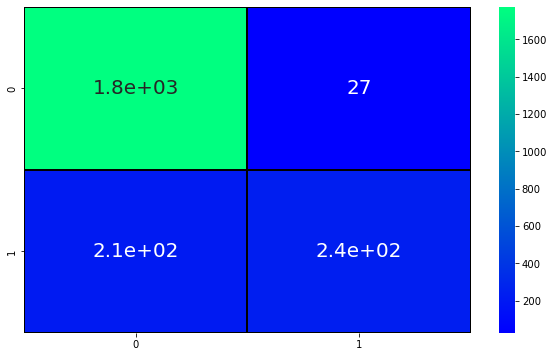

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=model.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1802
           1       0.90      0.53      0.66       445

    accuracy                           0.89      2247
   macro avg       0.90      0.76      0.80      2247
weighted avg       0.89      0.89      0.88      2247



In [51]:
#Evaluation Of Decission Tree

Testing Accuracy for Decision Tree 0.9902091677792613
Testing Sensitivity for Decision Tree 0.9933481152993349
Testing Specificity for Decision Tree 0.9774266365688488
Testing Precision for Decision Tree 0.9944506104328524
Testing accuracy for Decision Tree 0.9902091677792613


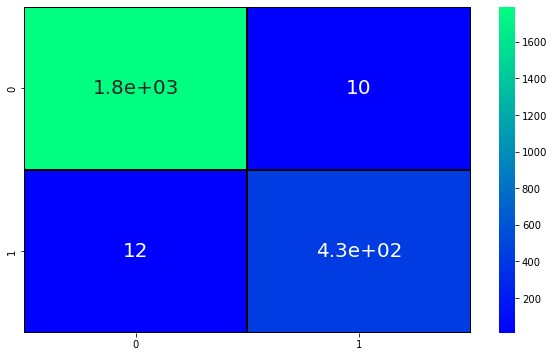

In [52]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [53]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1802
           1       0.98      0.97      0.98       445

    accuracy                           0.99      2247
   macro avg       0.99      0.98      0.98      2247
weighted avg       0.99      0.99      0.99      2247



In [58]:
import pickle

In [59]:
pickle.dump(rf,open("flight.pkl",'wb'))

In [60]:
#deployment

In [79]:
!pip install -U ibm-watson-machine-learning

In [80]:
from ibm_watson_machine_learning import APIClient

In [81]:
import json

In [82]:
import numpy as np

In [83]:
wml_cred={
 "apikey":"4fJbepuok7oCO1UkeKU831Sq5rz5-JP0R_hljeB2oaEL",
 "url":"https://us-south.ml.cloud.ibm.com"
}


In [84]:
wml_clients=APIClient(wml_cred)

In [85]:
wml_clients.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
deaaa6e0-4843-467d-94d8-71d0272de83b  flight delay           2022-11-10T16:39:49.137Z
875c75d7-ca1d-4cd4-9b2b-7cb88af3e2f8  flight delay analysis  2022-11-10T16:38:09.154Z
------------------------------------  ---------------------  ------------------------


In [86]:
space_id="deaaa6e0-4843-467d-94d8-71d0272de83b"

In [87]:
wml_clients.set.default_space(space_id)

'SUCCESS'

In [88]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [89]:
MODEL_NAME="RandomForestClassifier()"
DEPLOYMENT_NAME="flight delay"
DEMO_MODEL=model

In [90]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")


In [91]:
model_props={
 wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
 wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
 
}


In [92]:
model_details=wml_clients.repository.store_model(
    model=DEMO_MODEL
    ,meta_props=model_props
    ,training_data=x_train,
 training_target=y_train)

In [93]:
model_details
model_id=wml_clients.repository.get_model_id(model_details)
dep_props={
 wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 wml_clients.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [94]:
deployment=wml_clients.deployments.create(artifact_uid=model_id,meta_props=dep_props)




#######################################################################################

Synchronous deployment creation for uid: '45f7e8fa-d40e-4297-b108-290ce349e67f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='72e6ce01-fcd7-4fe4-9351-e903f4390880'
------------------------------------------------------------------------------------------------


